In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Import and Prepare Data

In [39]:
data = pd.read_csv('data.csv')

In [40]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
data = np.array(data)

m,n = data.shape
np.random.shuffle(data)

In [42]:
print(n)

785


In [49]:
test_data = data[0:1000].T

Y_test = test_data[0]
X_test = test_data[1:n]
X_test = X_test / 255.

train_data = data[1000:m].T
Y_train = train_data[0]
X_train = train_data[1:n]
X_train = X_train / 255.
_, m_train = X_train.shape

Building the Neural Network

In [66]:
def inparam():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

In [78]:
def ReLU(z):
    return np.maximum(z, 0)

In [79]:
def softmax(z):
    a = np.exp(z) / sum(np.exp(z))
    return a

In [88]:
def forwardprop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2


In [96]:
def onehotencoding(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [112]:
def backprop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = onehotencoding(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2
    

In [113]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = inparam()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forwardprop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backprop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = param_update(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [114]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[2 7 2 ... 5 8 5] [6 0 1 ... 7 0 4]
0.10541463414634146
Iteration:  10
[2 7 4 ... 5 7 1] [6 0 1 ... 7 0 4]
0.1994878048780488
Iteration:  20
[2 7 1 ... 5 7 1] [6 0 1 ... 7 0 4]
0.2851463414634146
Iteration:  30
[2 7 1 ... 0 7 1] [6 0 1 ... 7 0 4]
0.35536585365853657
Iteration:  40
[2 0 1 ... 0 7 1] [6 0 1 ... 7 0 4]
0.4205121951219512
Iteration:  50
[2 0 1 ... 0 7 1] [6 0 1 ... 7 0 4]
0.4817560975609756
Iteration:  60
[2 0 1 ... 5 7 1] [6 0 1 ... 7 0 4]
0.5347560975609756
Iteration:  70
[2 0 1 ... 5 0 8] [6 0 1 ... 7 0 4]
0.5796097560975609
Iteration:  80
[2 0 1 ... 5 0 4] [6 0 1 ... 7 0 4]
0.6132926829268293
Iteration:  90
[2 0 1 ... 5 0 4] [6 0 1 ... 7 0 4]
0.6404390243902439
Iteration:  100
[2 0 1 ... 5 0 4] [6 0 1 ... 7 0 4]
0.6625853658536586
Iteration:  110
[2 0 1 ... 5 0 4] [6 0 1 ... 7 0 4]
0.6809512195121952
Iteration:  120
[2 0 1 ... 5 0 4] [6 0 1 ... 7 0 4]
0.696390243902439
Iteration:  130
[2 0 1 ... 7 0 4] [6 0 1 ... 7 0 4]
0.7099024390243902
Iteration:  140


In [120]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forwardprop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def testpred(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [6]
Label:  6


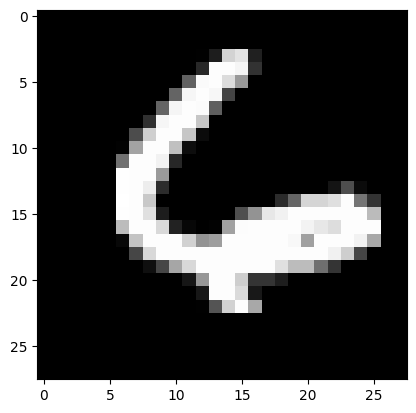

Prediction:  [0]
Label:  0


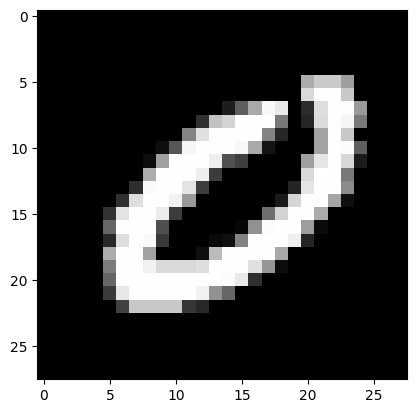

Prediction:  [1]
Label:  1


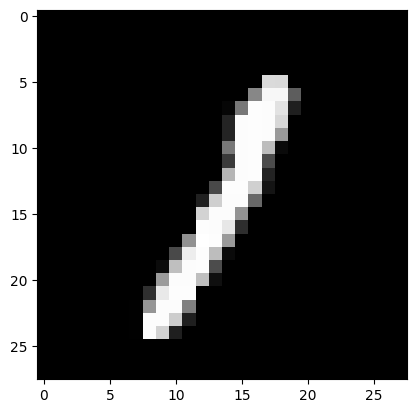

Prediction:  [9]
Label:  9


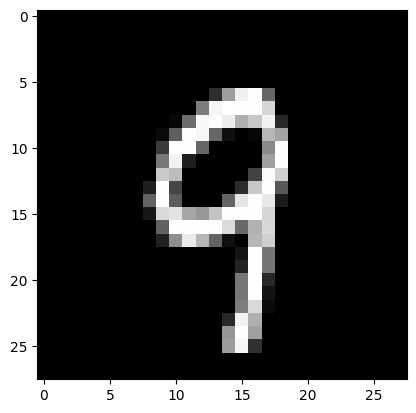

In [121]:
testpred(0, W1, b1, W2, b2)
testpred(1, W1, b1, W2, b2)
testpred(2, W1, b1, W2, b2)
testpred(3, W1, b1, W2, b2)